# Growth and Challenges
### A Deep Dive into South Asian Development

# EDA 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Connect to file

In [ ]:

data=pd.read_csv('archive/South_Asian_dataset.csv')
data.head()

In [ ]:
data.info()

In [ ]:
data = data.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'])


In [4]:
data['GDP (current US$)'] = data['GDP (current US$)'].str.replace(',', '.').astype(float)

In [ ]:
print(data['GDP (current US$)'].head()) 
print(data['GDP (current US$)'].dtype)

In [6]:
# Strip whitespace and convert to title case
data['Country'] = data['Country'].str.strip().str.title()


In [ ]:
print(data['Country'].nunique())  # Check the number of unique countries
print(data['Country'].unique())  # Inspect unique country names


In [ ]:
# Convert to integer if not already
data['Year'] = data['Year'].astype(int)

# Check range of years
print(data['Year'].min(), data['Year'].max())

# Sort by year if necessary
data = data.sort_values(by='Year')


In [ ]:
# Fill missing values with the mean or median:
# python
# Copy code

data['GDP growth (annual %)'] = data['GDP growth (annual %)'].fillna(data['GDP growth (annual %)'].mean())


In [ ]:
print(data.isnull().sum())


In [ ]:
data.info()

In [ ]:
data.head()

## demography of each country


In [ ]:
import matplotlib.pyplot as plt

# Filter the dataset for Pakistan
pakistan_data = data[(data['Country'] == 'Pakistan') & (data['Year'].between(2000, 2023))]

# Plot the population for Pakistan
plt.figure(figsize=(10, 6))
plt.plot(pakistan_data['Year'], pakistan_data['Population, total'], marker='o', label='Pakistan')

# Add labels and title
plt.title("Population of Pakistan (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


In [ ]:
# Filter the dataset for Nepal
nepal_data = data[(data['Country'] == 'Nepal') & (data['Year'].between(2000, 2023))]

# Plot the population for Nepal
plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Nepal')

# Add labels and title
plt.title("Population of Nepal (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


In [ ]:

nepal_data = data[(data['Country'] == 'India') & (data['Year'].between(2000, 2023))]

# Plot the population for india
plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='india')

# Add labels and title
plt.title("Population of India (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


In [ ]:

nepal_data = data[(data['Country'] == 'Sri Lanka') & (data['Year'].between(2000, 2023))]

# Plot the population for Sri Lanka
plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Sri Lanka')

# Add labels and title
plt.title("Population of Sri Lanka (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


In [ ]:

nepal_data = data[(data['Country'] == 'Bangladesh') & (data['Year'].between(2000, 2023))]

plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Bangladesh')

# Add labels and title
plt.title("Population of Bangladesh (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


In [ ]:
nepal_data = data[(data['Country'] == 'Afghanistan') & (data['Year'].between(2000, 2023))]

plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Afghanistan')

plt.title("Population of Afghanistan (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


In [ ]:
nepal_data = data[(data['Country'] == 'Bhutan') & (data['Year'].between(2000, 2023))]

plt.figure(figsize=(10, 6))
plt.plot(nepal_data['Year'], nepal_data['Population, total'], marker='o', label='Bhutan')

plt.title("Population of Bhutan (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.legend()
plt.show()


In [11]:
filtered_data = data[data['Year'].between(2000, 2023)][['Country', 'Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Population, total', 'Population growth (annual %)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)']]


## population in five years span

C:\Users\PC\AppData\Local\Temp\ipykernel_6180\2432515035.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pop = filtered_data.groupby(['Country', 'Interval'])[pop_column].mean().reset_index()


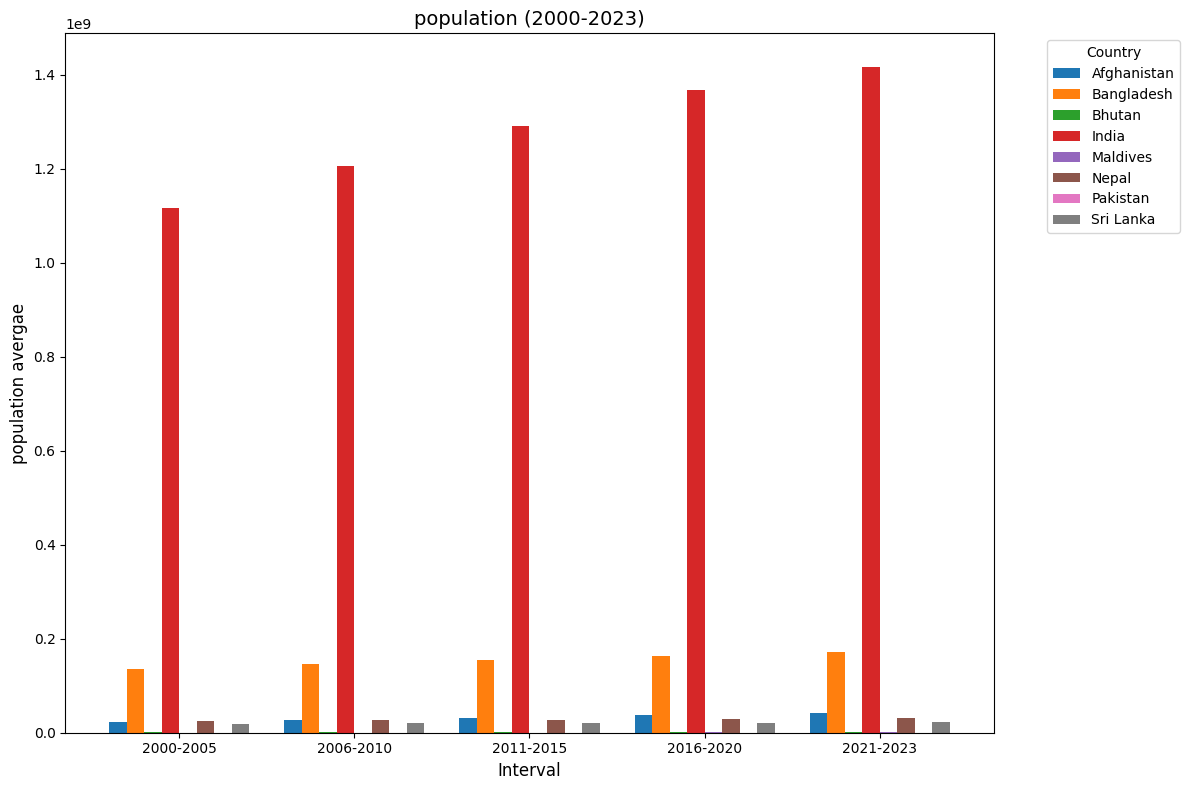

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct column name for unemployment
pop_column = 'Population, total'

# Create 5-year intervals
filtered_data['Interval'] = pd.cut(
    filtered_data['Year'],
    bins=[2000, 2005, 2010, 2015, 2020, 2023],  # Adjust bins as needed
    labels=['2000-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023'],
    right=True
)

# Threshold for outlier exclusion (e.g., max reasonable unemployment rate)
outlier_threshold = 20

# Replace outliers in Pakistan's unemployment data with NaN
filtered_data.loc[
    (filtered_data['Country'] == 'Pakistan') & 
    (filtered_data[pop_column] > outlier_threshold), 
    pop_column
] = None

avg_pop = filtered_data.groupby(['Country', 'Interval'])[pop_column].mean().reset_index()

pivot_data = avg_pop.pivot(index='Interval', columns='Country', values=pop_column)

pivot_data.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('population (2000-2023)', fontsize=14)
plt.xlabel('Interval', fontsize=12)
plt.ylabel('population avergae', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## unemployement

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct column name for unemployment
unemployment_column = 'Unemployment, total (% of total labor force) (modeled ILO estimate)'

# Create 5-year intervals
filtered_data['Interval'] = pd.cut(
    filtered_data['Year'],
    bins=[2000, 2005, 2010, 2015, 2020, 2023],  # Adjust bins as needed
    labels=['2000-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023'],
    right=True
)

# Threshold for outlier exclusion (e.g., max reasonable unemployment rate)
outlier_threshold = 20

# Replace outliers in Pakistan's unemployment data with NaN
filtered_data.loc[
    (filtered_data['Country'] == 'Pakistan') & 
    (filtered_data[unemployment_column] > outlier_threshold), 
    unemployment_column
] = None

# Recalculate average unemployment rates for each 5-year interval
avg_unemployment = filtered_data.groupby(['Country', 'Interval'])[unemployment_column].mean().reset_index()

# Pivot data for visualization
pivot_data = avg_unemployment.pivot(index='Interval', columns='Country', values=unemployment_column)

# Plot the data
pivot_data.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Average Unemployment Rate (2000-2023)', fontsize=14)
plt.xlabel('Interval', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## mortality rate

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct column name for mortality rate
mortality_column = 'Mortality rate, infant (per 1,000 live births)'

# Create 5-year intervals
filtered_data['Interval'] = pd.cut(
    filtered_data['Year'],
    bins=[2000, 2005, 2010, 2015, 2020, 2023],  # Adjust bins as needed
    labels=['2000-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023'],
    right=True
)

# Threshold for outlier exclusion (e.g., max reasonable mortality rate)
outlier_threshold = 100  # Adjust threshold as appropriate for mortality rates

# Replace outliers in Pakistan's mortality rate data with NaN
filtered_data.loc[
    (filtered_data['Country'] == 'Pakistan') & 
    (filtered_data[mortality_column] > outlier_threshold), 
    mortality_column
] = None

# Recalculate average mortality rates for each 5-year interval
avg_mortality = filtered_data.groupby(['Country', 'Interval'])[mortality_column].mean().reset_index()

# Pivot data for visualization
pivot_data = avg_mortality.pivot(index='Interval', columns='Country', values=mortality_column)

# Plot the data
pivot_data.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Average Infant Mortality Rate (2000-2023)', fontsize=14)
plt.xlabel('Interval', fontsize=12)
plt.ylabel('Average Infant Mortality Rate (per 1,000 live births)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

life_column = 'Life expectancy at birth, total (years)'

# Create 5-year intervals
filtered_data['Interval'] = pd.cut(
    filtered_data['Year'],
    bins=[2000, 2005, 2010, 2015, 2020, 2023],  # Adjust bins as needed
    labels=['2000-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023'],
    right=True
)

outlier_threshold = 20

filtered_data.loc[
    (filtered_data['Country'] == 'Pakistan') & 
    (filtered_data[life_column] > outlier_threshold), 
    life_column
] = None

avg_pop = filtered_data.groupby(['Country', 'Interval'])[life_column].mean().reset_index()

pivot_data = avg_pop.pivot(index='Interval', columns='Country', values=life_column)

pivot_data.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('gdp (2000-2023)', fontsize=14)
plt.xlabel('Interval', fontsize=12)
plt.ylabel(' life expectancy  avergae', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## machine learning model

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv('archive/South_Asian_dataset.csv')

# Select relevant columns
df = df[['GDP (current US$)', 'Population, total', 
         'Mortality rate, infant (per 1,000 live births)', 
         'Life expectancy at birth, total (years)']]

# Drop missing values
df = df.dropna()

# Clean the GDP column
df['GDP (current US$)'] = (
    df['GDP (current US$)']
    .replace(',', '', regex=True)  # Remove commas
    .astype(str)                   # Ensure it's a string for further processing
    .str.replace('E', 'e', regex=False)  # Normalize scientific notation
    .astype(float)                 # Convert to float
)

# Define features and target
features = ['Population, total', 
            'Mortality rate, infant (per 1,000 live births)', 
            'Life expectancy at birth, total (years)']
target = 'GDP (current US$)'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Predict GDP for a new input
new_data = pd.DataFrame({
    'Population, total': [25000000],  # Example population
    'Mortality rate, infant (per 1,000 live births)': [25],  # Example mortality rate
    'Life expectancy at birth, total (years)': [72]  # Example life expectancy
})

predicted_gdp = model.predict(new_data)
print(f"Predicted GDP: ${predicted_gdp[0]:,.2f}")


Mean Squared Error: 3.8378091424329907e+36
R² Score: 0.8894087050485993
Predicted GDP: $31,588,573,391.94


In [64]:
print(data.columns)


Index(['Country', 'Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Population, total', 'Population growth (annual %)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')


In [66]:
print(filtered_data.columns)


Index(['Country', 'Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Population, total', 'Population growth (annual %)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)'],
      dtype='object')
